# Capstone 2: Biodiversity Project

- Name: Petr Vlasak


- Email: petr.vlasakk@gmail.com


- GitHub: https://github.com/pvlasak

In [84]:
from matplotlib import pyplot as plt
import pandas as pd

In this project I will work with data provided by Codecademy which includes two datasets about the biodiversity in several national parks in US. 

Available datasets are:
    
- species_info.csv
- observations.csv

## Data Analysis of Species

Data from species_info.csv can be inspected by loading them into dataframe:

In [85]:
species = pd.read_csv("species_info.csv")

In [86]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [87]:
print("Dataframe dimensions are: {}".format(species.shape))

Dataframe dimensions are: (5824, 4)


In [80]:
print("There is {} unique scientific names in the dataframe.".format(species.scientific_name.nunique()))

There is 5541 unique scientific names in the dataframe.


Obviously columns contain duplicated values. 

In [81]:
list_category = species.category.unique().tolist()
print("In the dataset following categories of species are available: \n \n {}".format(list_category))

In the dataset following categories of species are available: 
 
 ['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']


What are the different values of `conservation_status`?

In [82]:
conserv_statuses = species.conservation_status.unique().tolist()
print("In the dataset following conservation statuses are assigned to species: \n \n {}".format(conserv_statuses))

In the dataset following conservation statuses are assigned to species: 
 
 [nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']


### Amount of species per conservation status

Amount of species per each conservation status can be gained after groupping data by scientific_name column. Considering the duplicities in scientific_name column, only the unique values are counted:

In [83]:
species.groupby("conservation_status").scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


But obviously most of the species have NaN value in the convervation_status column. Those values can be replaced by "No Intervention" string. 

In [25]:
species.fillna("No Intervention", inplace = True)

Data can be aggregated again and sorted. 

In [27]:
protection_counts = species.groupby('conservation_status')\
    .scientific_name.nunique().reset_index()\
    .sort_values(by='scientific_name')

In [28]:
protection_counts.head()

,conservation_status,scientific_name
1,In Recovery,4
4,Threatened,10
0,Endangered,15
3,Species of Concern,151
2,No Intervention,5363


Table above can be visualised like a bar chart.

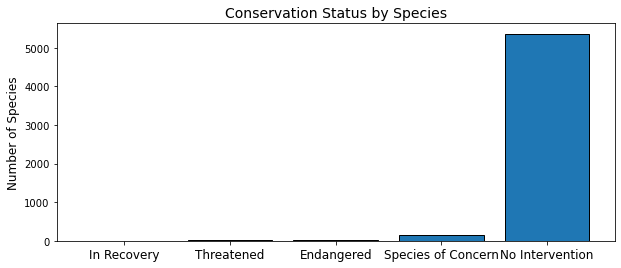

In [32]:
fig, ax = plt.subplots(1,1, figsize = (10, 4))
x_ticks_coo = range(len(protection_counts))   
x_ticks_labels = protection_counts.conservation_status.tolist()
bar_data = protection_counts.scientific_name.tolist()
plt.bar(x_ticks_coo, bar_data, edgecolor = 'black')
ax.set_xticks(x_ticks_coo)
ax.set_xticklabels(labels = x_ticks_labels, fontsize = 12)
ax.set_ylabel('Number of Species', fontsize = 12)
ax.set_title('Conservation Status by Species', fontsize = 14)
plt.show()

### Are certain types of species more likely to be endangered?

A new column can be created in `species` table called `is_protected`, which is `True` if `conservation_status` is not equal to `No Intervention`, and `False` otherwise.

In [35]:
species["is_protected"] = species.conservation_status.apply(lambda x: True if x != 'No Intervention' else False)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [36]:
category_counts = species.groupby(["category", "is_protected"]).scientific_name.nunique().reset_index()

Species data can be groupped by category and status of protection. Only unique scientific names are counted and shown like a new dataframe:

In [37]:
category_pivot = category_counts.pivot(index = 'category', columns = 'is_protected', values = 'scientific_name').reset_index()

In [39]:
category_pivot.rename(columns = {False : 'not_protected',
                                  True : 'protected'}, inplace = True)
category_pivot

is_protected,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [40]:
category_pivot["percent_protected"] = category_pivot["protected"] / (category_pivot["protected"] + category_pivot["not_protected"])

Percentage of protected species can be calculated for every category:

In [41]:
category_pivot

is_protected,category,not_protected,protected,percent_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


### A/B test to compare endangered species in category Bird and Mammal

Is the category Mammal more endangered than category Bird?
Mammal category has higher percentage of protected species but the answer can be given as result of A/B Chi Square Test. 

Two categorical variables are identified for the AB Test - Mammal and Bird.

Counts of protected and not protected species can be inserted into a contigency table, which is the input for AB test. 


In [42]:
contingency = [[30, 146],
               [75, 413]
              ]

In [43]:
from scipy.stats import chi2_contingency

In [46]:
_, pvalue, _, _ = chi2_contingency(contingency)
print("P-value output from Chi Square test is: {}".format(round(pvalue,5)))

P-value output from Chi Square test is: 0.68759


Based on p-value the difference in percentage of protected species **is not statistically significant** and null hypothesis therefore can't be rejected. 

### A/B test to compare endangered species in category Reptile and Mammal

Counts of protected and not protected species are inserted into the contigency table, which is an input for the A/B Test. 

In [47]:
contingency = [[5, 73],
               [30, 146]
              ]
_, pvalue, _, _ = chi2_contingency(contingency)
print("P-value output from Chi Square test is: {}".format(round(pvalue,5)))

P-value output from Chi Square test is: 0.03836


Based on p-value the difference in percentage of protected species **is statistically significant** and null hypothesis therefore can be rejected. 

## Sheep observations

Conservationists have been recording sightings of different species at several national parks for the past 7 days and saved the results into `observations.csv`. 

In [60]:
observations = pd.read_csv("observations.csv")
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


Some scientists are studying the number of sheep sightings at different national parks.  There are several different scientific names for different types of sheep.

In [61]:
species["is_sheep"] = species.common_names.apply(lambda x: True if 'Sheep' in x else False)

Only entries that has "Sheep" string in the `common_names` column are selected:

In [62]:
species.query("is_sheep == True")

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
1139,Vascular Plant,Rumex acetosella,"Sheep Sorrel, Sheep Sorrell",No Intervention,False,True
2233,Vascular Plant,Festuca filiformis,Fineleaf Sheep Fescue,No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3758,Vascular Plant,Rumex acetosella,"Common Sheep Sorrel, Field Sorrel, Red Sorrel,...",No Intervention,False,True
3761,Vascular Plant,Rumex paucifolius,"Alpine Sheep Sorrel, Fewleaved Dock, Meadow Dock",No Intervention,False,True
4091,Vascular Plant,Carex illota,"Sheep Sedge, Smallhead Sedge",No Intervention,False,True
4383,Vascular Plant,Potentilla ovina var. ovina,Sheep Cinquefoil,No Intervention,False,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


The output shows that there are many entries that have "Sheep" string part of their common names, but some of them are assigned to `Vascular Plant` category. Therefore only species in Mammal category are filterred and it shows that there are only 3 sheep species in the dateset.  

In [63]:
sheep_species = species.query("is_sheep == True and category == 'Mammal'")
sheep_species

,category,scientific_name,common_names,conservation_status,is_protected,is_sheep
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
3014,Mammal,Ovis canadensis,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4446,Mammal,Ovis canadensis sierrae,Sierra Nevada Bighorn Sheep,Endangered,True,True


Dataframe of sheep species in Mammal category can be now merged with `observation` dataframe. 

In [64]:
sheep_observations = observations.merge(sheep_species)
sheep_observations

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_sheep
0,Ovis canadensis,Yellowstone National Park,219,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
1,Ovis canadensis,Bryce National Park,109,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
2,Ovis canadensis,Yosemite National Park,117,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
3,Ovis canadensis,Great Smoky Mountains National Park,48,Mammal,"Bighorn Sheep, Bighorn Sheep",Species of Concern,True,True
4,Ovis canadensis sierrae,Yellowstone National Park,67,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
5,Ovis canadensis sierrae,Yosemite National Park,39,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
6,Ovis canadensis sierrae,Bryce National Park,22,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
7,Ovis canadensis sierrae,Great Smoky Mountains National Park,25,Mammal,Sierra Nevada Bighorn Sheep,Endangered,True,True
8,Ovis aries,Yosemite National Park,126,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True
9,Ovis aries,Great Smoky Mountains National Park,76,Mammal,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,True


Total number of sheep observations (across all three species) at each national park can be calculated.

This is the total number of sheep observed in each park over the past 7 days.
Weekly observation counts are plotted as a bar chart below:

In [65]:
obs_by_park = sheep_observations.groupby("park_name").sum("observations")[["observations"]].reset_index()
obs_by_park

,park_name,observations
0,Bryce National Park,250
1,Great Smoky Mountains National Park,149
2,Yellowstone National Park,507
3,Yosemite National Park,282


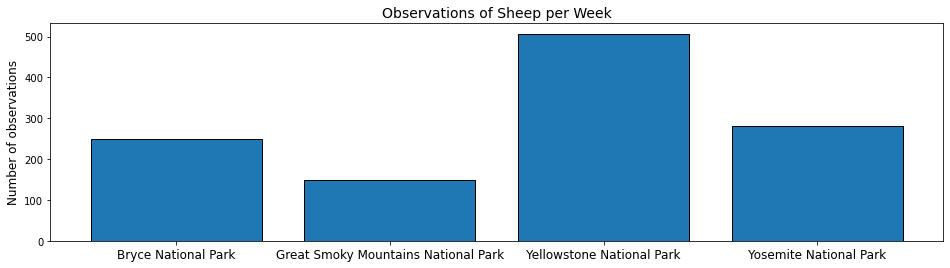

In [66]:
fig, ax = plt.subplots(1,1, figsize = (16, 4))

bar_heights = obs_by_park.observations.tolist()
bar_pos = range(len(obs_by_park))

plt.bar(bar_pos, bar_heights, edgecolor = 'black')
ax.set_xticks(range(len(obs_by_park)))
ax.set_xticklabels(labels = obs_by_park.park_name.tolist(), fontsize = 12)
ax.set_ylabel("Number of observations", fontsize = 12)
ax.set_title("Observations of Sheep per Week", fontsize = 14)
plt.show()

## Foot and mouth disease study

Suppose that the scientists know that 15% of sheep at Bryce National Park have foot and mouth disease.  Park rangers at Yellowstone National Park have been running a program to reduce the rate of foot and mouth disease at that park.  The scientists want to test whether or not this program is working.  They want to be able to detect reductions of at least 5 percentage points.  For instance, if 10% of sheep in Yellowstone have foot and mouth disease, they'd like to be able to know this, with confidence.

With usage of the link <a href="https://s3.amazonaws.com/codecademy-content/courses/learn-hypothesis-testing/a_b_sample_size/index.html">Codecademy's sample size calculator</a> the number of sheep that they would need to observe from each park can be calculated.  Use the default level of significance (90%).


In [67]:
baseline = 15

"Minimum Detectable Effect" is a percent of the baseline.

In [88]:
minimum_detectable_effect = (15-10) * 100 / 15

sample_size = 890

print("Sample size needed to conduct a study with level of significance 90% has been calculated with usage of calculator: {} observations".format(sample_size))

Sample size needed to conduct a study with level of significance 90% has been calculated with usage of calculator: 890 observations


Duration of study for Bryce National Park and Yellowstone National Park can be calculated as `sample size` / `total observations per location` :

In [89]:
weeks_bryc_park = round(sample_size / obs_by_park.loc[0, 'observations'],1)
print("Result: ")
print("Sheep observation in Bryce National Park must take {} week.".format(weeks_bryc_park))

Result: 
Sheep observation in Bryce National Park must take 3.6 week.


In [70]:
weeks_yellowst_park = round(sample_size / obs_by_park.loc[2, 'observations'],1)
print("Sheep observation in Yellowstone National Park must take {} week.".format(weeks_yellowst_park))

Sheep observation in Yellowstone National Park must take 1.8 week.


# Conclusion

    1. Highest percentage of endangered species has category Mammals. 


    2. Mammals do not seems to be more endangered than Bird category according to resultant p-value from A/B Test. 


    3. Mammals are more likely to be endangered than Reptile category. A-B test found a statistically significant difference in        values of protected and not protected species. 


    4. Yellowstone Park has the highest number of observations for sheep species. 


    5. In order to finish a study of mouth and foot disease for the sheep species with 90 % level of significance, the      observations must take 3.6 week in Bryce National Park and 1.8 week in Yellowstone Park. 